Dataset Description

The titanic.csv file contains data for 887 of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person including whether they survived (S), their age (A), their passenger-class (C), their sex (G) and the fare they paid (X).

Features
survival - Survival (0 = No; 1 = Yes)
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name - Name
sex - Sex
age - Age
pclass - A proxy for socio-economic status (SES)(1=Upper, 2=Middle,3=Lower)
sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fare
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Target
Our target column is Survived one. We have to predict an arbitrary person on the titanic will survive or not using the machine learning model algorithm

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Random Row from the dataset
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Checking the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:>

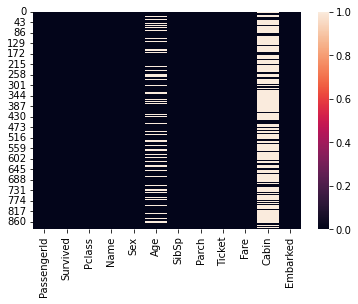

In [11]:
# showing the null values using the heatmap 
sns.heatmap(df.isnull())

In [12]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

list1=['Cabin','Embarked','Sex','Ticket']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))

In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Cabin            int32
Embarked         int32
dtype: object

# after doing the label encoding the dtype of cabin and embarked column changed to int

In [14]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,101,13.00,147,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,14,30.00,30,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,675,23.45,147,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,8,30.00,60,0
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,466,7.75,147,1


In [15]:
df['Embarked'].isnull().sum()

0

# Filling the null values in the age column with the mean

In [16]:
df['Age']=df['Age'].fillna(np.mean(df['Age']))

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

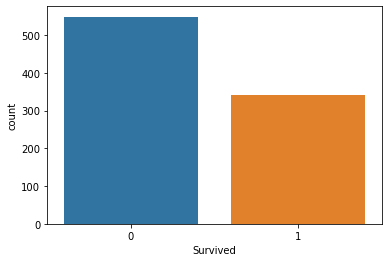

In [19]:
sns.countplot(df['Survived'])

In [20]:
# Drop the name column as it doesn't affect our further process.
df.drop('Name',axis=1,inplace=True)

In [21]:
# Shifting the Survived column in the last.
df=df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']]
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,1,22.0,1,0,523,7.2500,147,2,0
1,2,1,0,38.0,1,0,596,71.2833,81,0,1
2,3,3,0,26.0,0,0,669,7.9250,147,2,1
3,4,1,0,35.0,1,0,49,53.1000,55,2,1
4,5,3,1,35.0,0,0,472,8.0500,147,2,0


In [22]:
# defining the dependent and independent variables
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [23]:
# SMOTE.

from imblearn.over_sampling import SMOTE
smt= SMOTE(random_state=0,k_neighbors=1)
train_x,train_y=smt.fit_resample(x,y)
train_y.value_counts()

0    549
1    549
Name: Survived, dtype: int64

# Now the datstet is balanced.


In [24]:
# putting the balanced dataset into a dataframe

df_new=pd.DataFrame(data=train_x)
df_new['Survived']=train_y
df=df_new
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,1,22.000000,1,0,523,7.250000,147,2,0
1,2,1,0,38.000000,1,0,596,71.283300,81,0,1
2,3,3,0,26.000000,0,0,669,7.925000,147,2,1
3,4,1,0,35.000000,1,0,49,53.100000,55,2,1
4,5,3,1,35.000000,0,0,472,8.050000,147,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1093,72,2,1,14.551187,0,1,172,22.462774,147,1,1
1094,27,3,0,26.518934,0,0,281,7.911653,147,1,1
1095,299,1,0,28.058298,0,0,86,96.674271,147,0,1
1096,546,2,0,21.078272,1,0,233,26.000000,147,2,1


In [25]:
# Statistical Summary
df.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000
mean,444.363388,2.228597,0.547359,29.342564,0.479964,0.357923,329.721311,34.946855,129.155738,1.472678,0.500000
std,255.590995,0.850557,0.497979,12.690543,1.032763,0.768771,204.244908,51.240173,36.860900,0.814455,0.500228
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,228.000000,1.000000,0.000000,22.000000,0.000000,0.000000,141.250000,8.050000,143.000000,1.000000,0.000000
50%,442.500000,3.000000,1.000000,29.699118,0.000000,0.000000,327.500000,15.850000,147.000000,2.000000,0.500000
75%,664.750000,3.000000,1.000000,35.000000,1.000000,0.000000,519.000000,35.500000,147.000000,2.000000,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000,1.000000


# Observations

Outlers are present in the dataset.
Skewness is present in the dataset.
Many of the columns ahve their minimum value as 0.

In [26]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,1,22.0,1,0,523,7.2500,147,2,0
1,2,1,0,38.0,1,0,596,71.2833,81,0,1
2,3,3,0,26.0,0,0,669,7.9250,147,2,1
3,4,1,0,35.0,1,0,49,53.1000,55,2,1
4,5,3,1,35.0,0,0,472,8.0500,147,2,0


In [27]:
# Correlation
corr=df.corr()
corr

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,1.000000,-0.064358,0.053791,0.036401,-0.057898,-0.015081,-0.056225,0.031490,-0.049527,0.009828,-0.010385
Pclass,-0.064358,1.000000,0.171341,-0.313608,0.100172,0.037865,0.308711,-0.561474,0.677975,0.162327,-0.356727
Sex,0.053791,0.171341,1.000000,0.102157,-0.068166,-0.181234,0.095070,-0.177115,0.111162,0.150410,-0.612956
Age,0.036401,-0.313608,0.102157,1.000000,-0.218412,-0.199044,-0.039475,0.104648,-0.221710,0.001262,-0.084553
SibSp,-0.057898,0.100172,-0.068166,-0.218412,1.000000,0.404576,0.069788,0.120850,0.055025,0.079004,-0.071463
Parch,-0.015081,0.037865,-0.181234,-0.199044,0.404576,1.000000,0.014639,0.165054,-0.009786,0.051302,0.036742
Ticket,-0.056225,0.308711,0.095070,-0.039475,0.069788,0.014639,1.000000,-0.002777,0.260847,-0.027100,-0.170843
Fare,0.031490,-0.561474,-0.177115,0.104648,0.120850,0.165054,-0.002777,1.000000,-0.519457,-0.227464,0.250483
Cabin,-0.049527,0.677975,0.111162,-0.221710,0.055025,-0.009786,0.260847,-0.519457,1.000000,0.193728,-0.239699
Embarked,0.009828,0.162327,0.150410,0.001262,0.079004,0.051302,-0.027100,-0.227464,0.193728,1.000000,-0.206967


<AxesSubplot:>

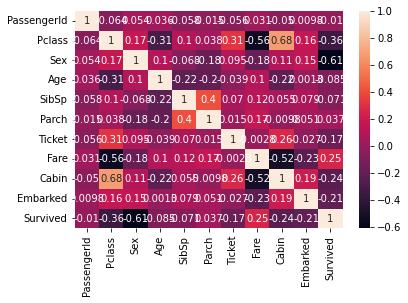

In [28]:
# Plotting the correlation using heatmap.
sns.heatmap(corr,annot=True)

In [29]:
# sorting the correlation value of target column

corr['Survived'].sort_values()

Sex           -0.612956
Pclass        -0.356727
Cabin         -0.239699
Embarked      -0.206967
Ticket        -0.170843
Age           -0.084553
SibSp         -0.071463
PassengerId   -0.010385
Parch          0.036742
Fare           0.250483
Survived       1.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

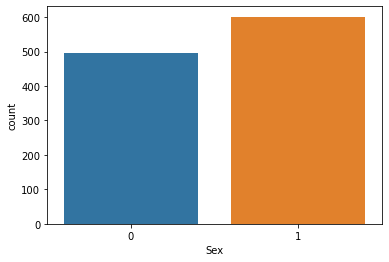

In [30]:
sns.countplot(df['Sex'])

<AxesSubplot:xlabel='Survived', ylabel='Density'>

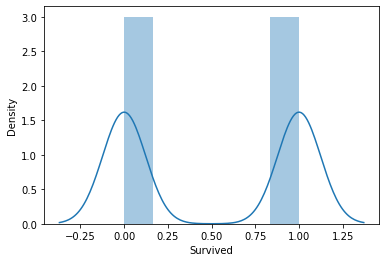

In [31]:
sns.distplot(df['Survived'])
# it shows there is only two values present in the datset i.e. 0 or 1

<AxesSubplot:xlabel='Age', ylabel='Density'>

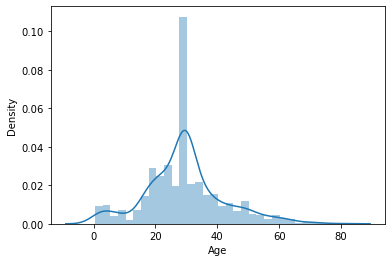

In [32]:
# it is very close to normalized curve.
sns.distplot(df['Age'])

<AxesSubplot:xlabel='PassengerId', ylabel='Density'>

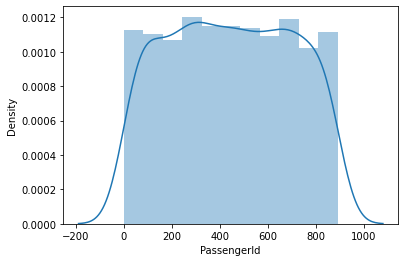

In [33]:
# a very normalized curve
sns.distplot(df['PassengerId'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

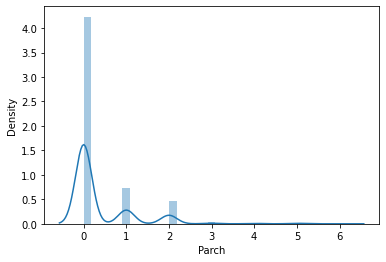

In [34]:
# there are only three values 0,1,2 in the column
sns.distplot(df['Parch'])

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

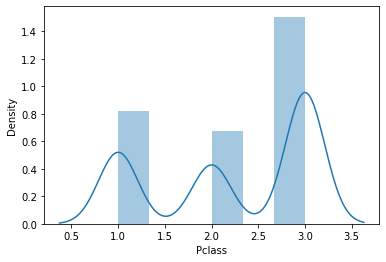

In [35]:
# the graph is multimodality
sns.distplot(df['Pclass'])

<AxesSubplot:xlabel='Cabin', ylabel='Density'>

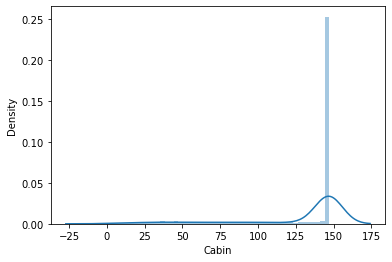

In [36]:
# the data is right skewed
sns.distplot(df['Cabin'])

<AxesSubplot:xlabel='Embarked', ylabel='Density'>

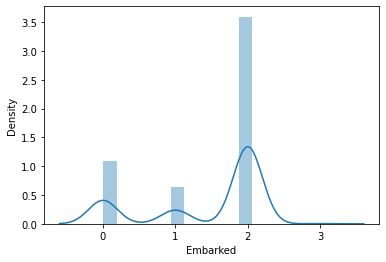

In [37]:
# there are only three values 0,1,2 in the column
sns.distplot(df['Embarked'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

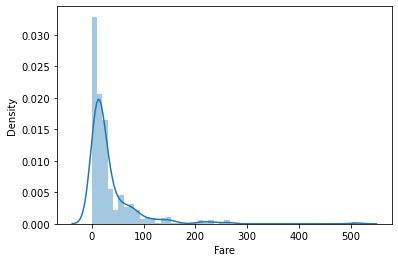

In [38]:
# left skewness is present in the fare column
sns.distplot(df['Fare'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

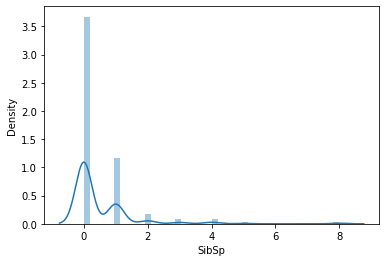

In [40]:
# most has the value 0 and less data towards the higher values
sns.distplot(df['SibSp'])

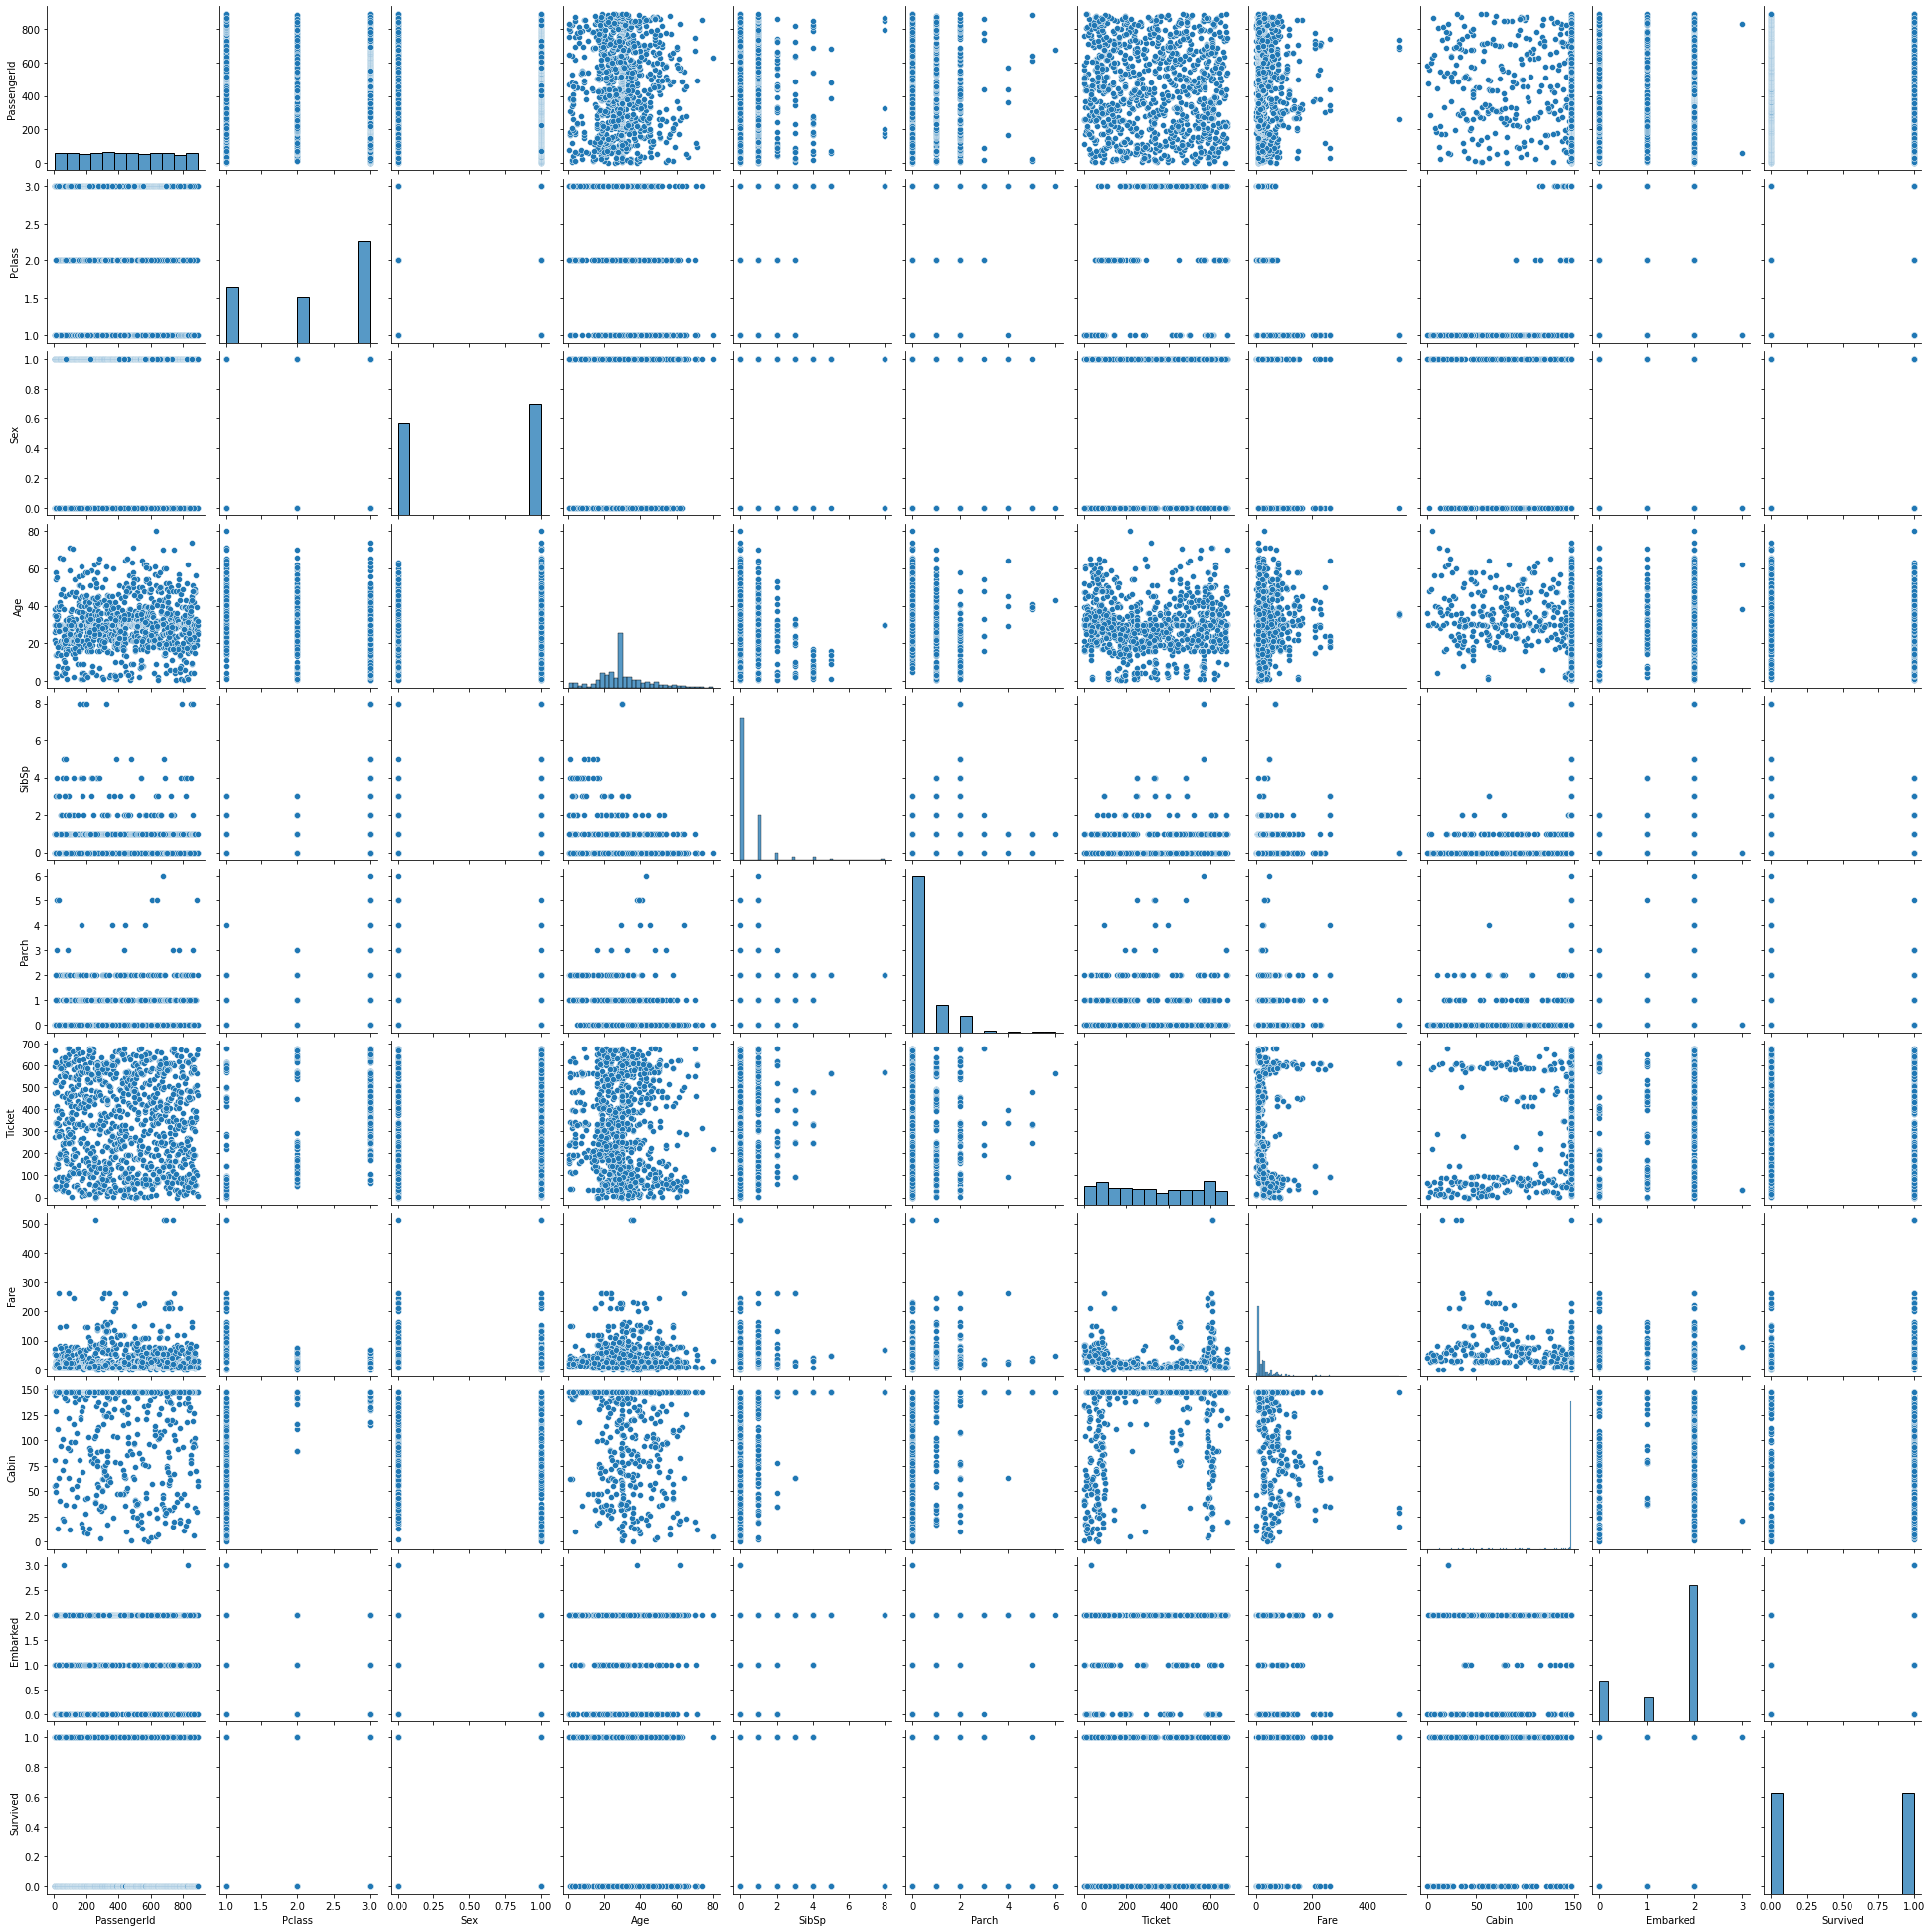

In [41]:
# pairplot graph
sns.pairplot(df)

<AxesSubplot:xlabel='Parch', ylabel='Count'>

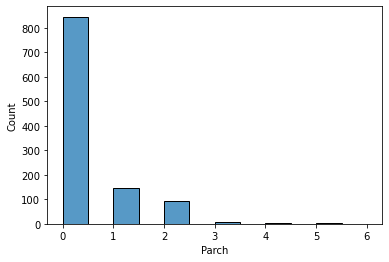

In [43]:
# very high count on 0 and and very less count on 3, 4, 5
sns.histplot(df['Parch'])

<AxesSubplot:xlabel='PassengerId', ylabel='Count'>

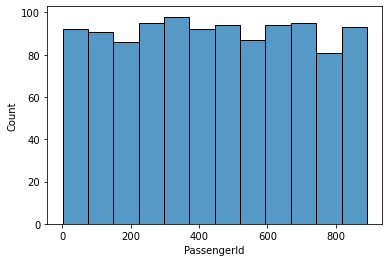

In [44]:
# the data is almost equally distributed
sns.histplot(df['PassengerId'])

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

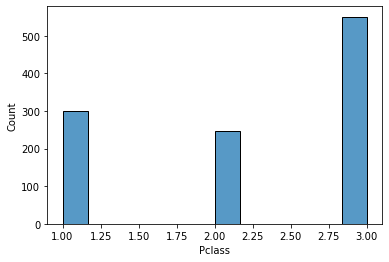

In [45]:
# a countplot for the three variabled of Parch column
sns.histplot(df['Pclass'])

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

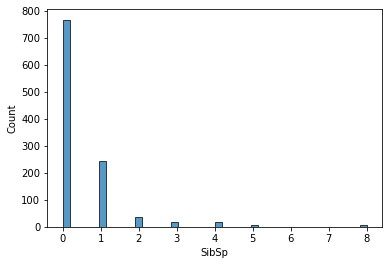

In [46]:
# a very large data is on the highrt side
sns.histplot(df['SibSp'])

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

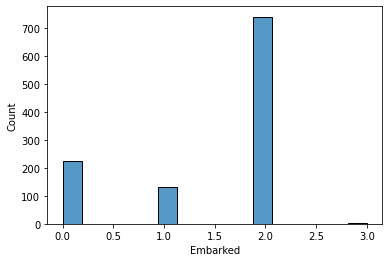

In [47]:
# a very less count the embarked value=3
sns.histplot(df['Embarked'])

<AxesSubplot:xlabel='Ticket', ylabel='Count'>

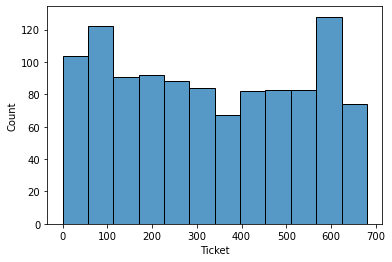

In [48]:
# data is almost equally distributed
sns.histplot(df['Ticket'])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

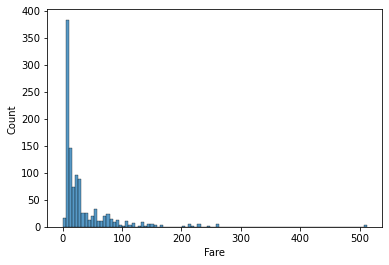

In [49]:
# most of the data is on the lower side
sns.histplot(df['Fare'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

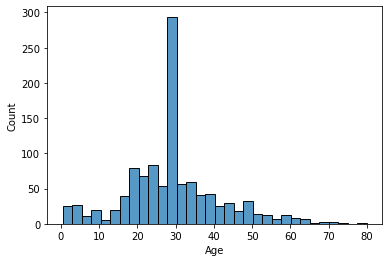

In [50]:
# young peoples are more on the ship
sns.histplot(df['Age'])

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

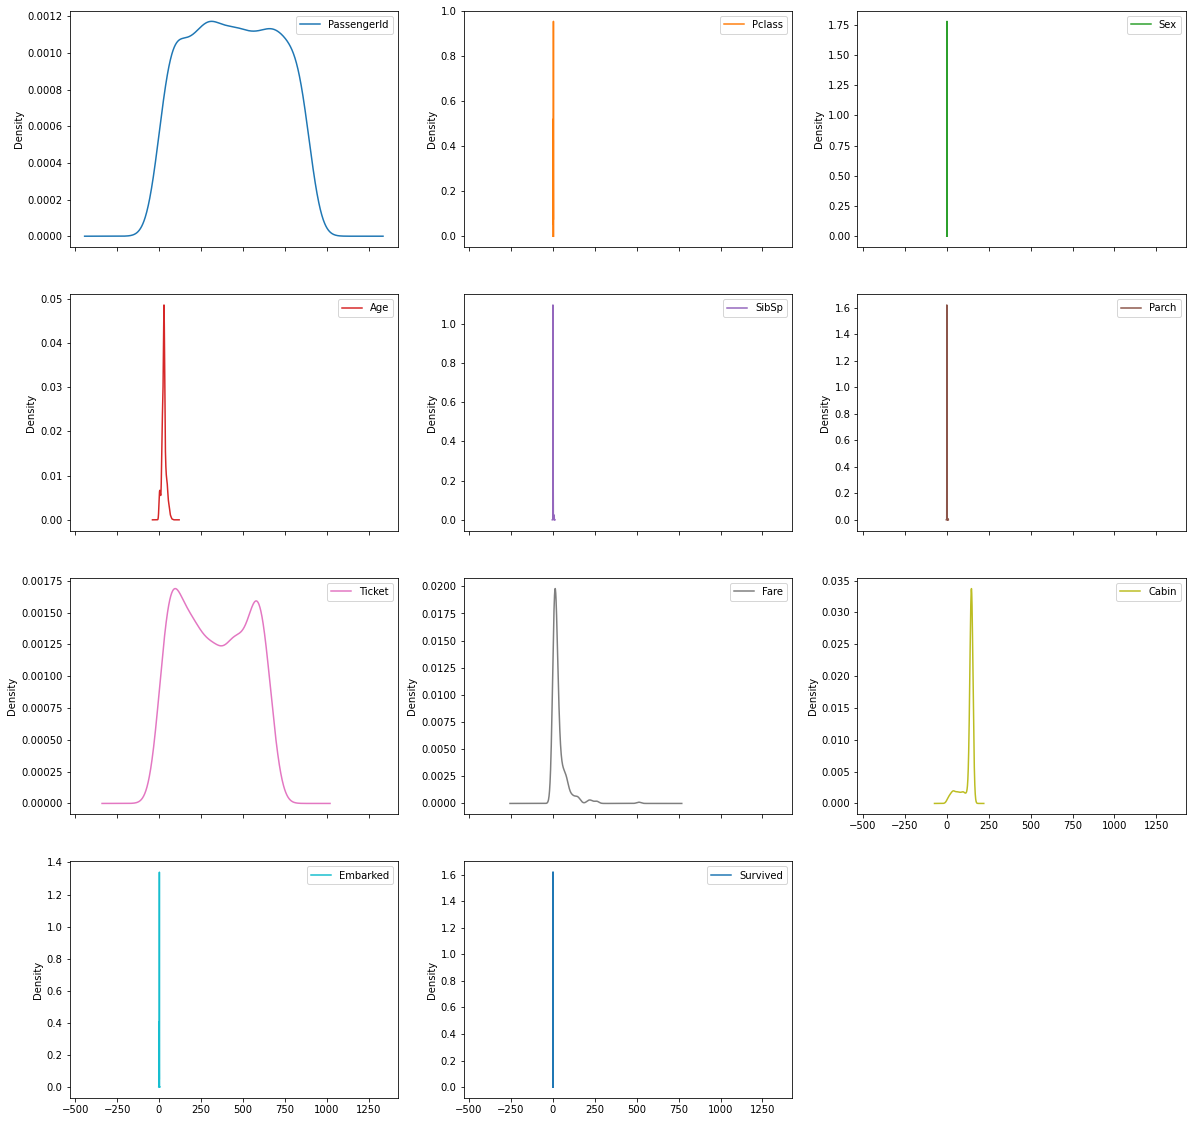

In [51]:
# kde plot of each column, we get a rough idea that skewness present in the dataset
f.plot(kind='kde',subplots=True,layout=(4,3),figsize=(20,20))

PassengerId        AxesSubplot(0.125,0.71587;0.227941x0.16413)
Pclass          AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Sex             AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Age               AxesSubplot(0.125,0.518913;0.227941x0.16413)
SibSp          AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Parch          AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Ticket            AxesSubplot(0.125,0.321957;0.227941x0.16413)
Fare           AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Cabin          AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Embarked             AxesSubplot(0.125,0.125;0.227941x0.16413)
Survived          AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

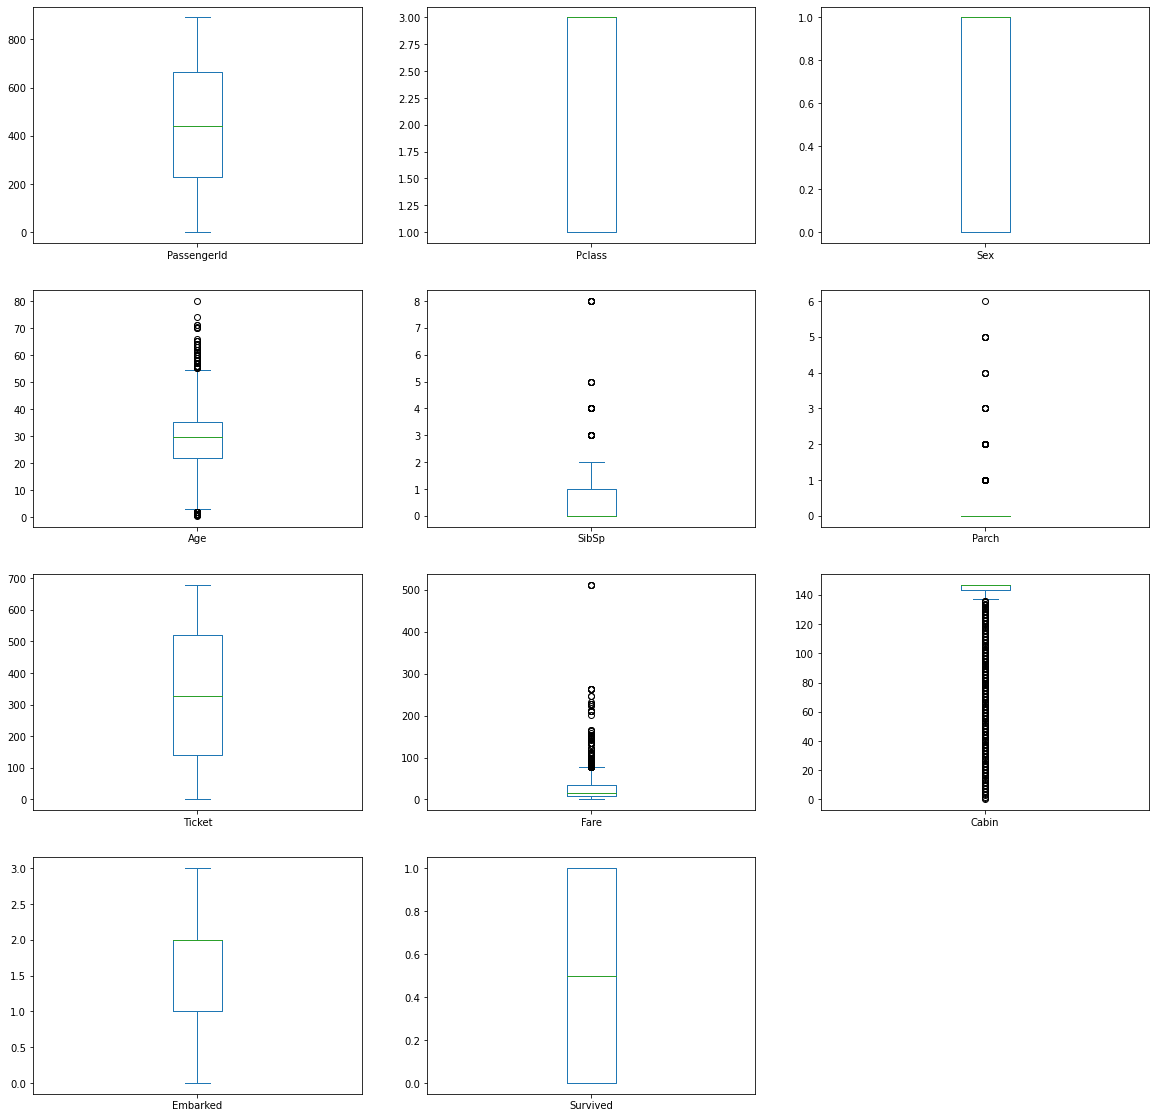

In [52]:
# Plotting outliers.
# Outliers present in the datset and we have to remove them
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(20,20))

In [53]:
# sepearting the dependent and independent varaibles
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [54]:
df.skew()

PassengerId    0.009437
Pclass        -0.454705
Sex           -0.190551
Age            0.419408
SibSp          3.829273
Parch          2.786835
Ticket         0.056883
Fare           4.493227
Cabin         -1.981782
Embarked      -1.042679
Survived       0.000000
dtype: float64

In [55]:
#removing the skewness

from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x.skew()

PassengerId   -0.276598
Pclass        -0.329548
Sex           -0.190551
Age            0.063742
SibSp          0.885969
Parch          1.284243
Ticket        -0.284417
Fare          -0.031625
Cabin         -1.451478
Embarked      -0.763587
dtype: float64

In [56]:
#removing the outliers from the data

from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df=df_new
df.shape

(array([  13,   16,   23,   25,   27,   50,   59,   68,   71,   86,   88,
         96,   96,  116,  118,  119,  159,  164,  167,  170,  171,  174,
        180,  182,  185,  201,  209,  233,  258,  261,  266,  278,  284,
        299,  311,  324,  329,  341,  360,  377,  380,  386,  437,  438,
        438,  445,  475,  480,  493,  523,  527,  541,  542,  556,  557,
        567,  583,  599,  610,  630,  630,  638,  647,  672,  678,  679,
        683,  686,  689,  700,  716,  730,  736,  737,  737,  742,  745,
        774,  779,  787,  792,  806,  813,  815,  824,  846,  850,  851,
        858,  863,  867,  885,  916,  926,  927,  929,  959,  975, 1005,
       1012, 1028, 1066], dtype=int64), array([5, 4, 8, 5, 7, 4, 4, 4, 4, 5, 7, 3, 8, 3, 7, 4, 4, 4, 5, 8, 4, 8,
       4, 4, 8, 4, 8, 4, 7, 4, 4, 4, 8, 7, 7, 4, 8, 7, 5, 7, 7, 4, 5, 5,
       7, 8, 8, 4, 3, 8, 7, 4, 4, 8, 7, 5, 8, 8, 5, 3, 8, 5, 8, 3, 5, 7,
       4, 4, 7, 7, 7, 7, 5, 7, 8, 7, 3, 5, 7, 4, 4, 8, 4, 8, 4, 4, 4, 3,
       5, 

(1000, 11)

In [57]:
#scaling the data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.15495565,  0.9356113 ,  0.9093707 , ..., -0.96993085,
         0.54198339,  0.66684746],
       [-2.13864489, -1.38449114, -1.09966155, ...,  1.24982025,
        -1.90601356, -1.65968372],
       [-2.12385131,  0.9356113 , -1.09966155, ..., -0.88087332,
         0.54198339,  0.66684746],
       ...,
       [-0.46809651, -1.38449114, -1.09966155, ...,  1.521661  ,
         0.54198339, -1.65968372],
       [ 0.46048779, -0.40556471, -1.09966155, ...,  0.30166573,
         0.54198339,  0.66684746],
       [-0.22699578,  0.9356113 , -1.09966155, ..., -0.88667827,
         0.54198339, -0.97099539]])

In [58]:
#importing the different machine learning models

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [59]:
#defining the models 

lg=LogisticRegression()
rdc=RandomForestClassifier()
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()

In [60]:
# Finding the best random state.

model=[lg,rdc,svc,dtc,knc]
maxAccu=0
bestRS=0
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        bestRS=i
print('Best Accuracy score is', maxAccu , 'on random state', bestRS)

Best Accuracy score is 0.8454545454545455 on random state 57


In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57,test_size=.30)

In [62]:
# Logistic Regression

lg.fit(x_train,y_train)
pred=lg.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.8454545454545455
Confusion Matrix:  
 [[134  30]
 [ 21 145]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       164
           1       0.83      0.87      0.85       166

    accuracy                           0.85       330
   macro avg       0.85      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330



In [63]:
# Decission Tree Classifier.
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.8242424242424242
Confusion Matrix:  
 [[132  32]
 [ 26 140]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       164
           1       0.81      0.84      0.83       166

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



In [65]:
# Support Vector Classifier.
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.8606060606060606
Confusion Matrix:  
 [[139  25]
 [ 21 145]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       164
           1       0.85      0.87      0.86       166

    accuracy                           0.86       330
   macro avg       0.86      0.86      0.86       330
weighted avg       0.86      0.86      0.86       330



In [66]:
# Random Forest Classifier

rdc.fit(x_train,y_train)
pred=rdc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.8727272727272727
Confusion Matrix:  
 [[139  25]
 [ 17 149]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       164
           1       0.86      0.90      0.88       166

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330



In [67]:
# KNeighbor Classifier.

knc.fit(x_train,y_train)
pred=knc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.8121212121212121
Confusion Matrix:  
 [[138  26]
 [ 36 130]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       164
           1       0.83      0.78      0.81       166

    accuracy                           0.81       330
   macro avg       0.81      0.81      0.81       330
weighted avg       0.81      0.81      0.81       330



In [68]:
# CV Score.

from sklearn.model_selection import cross_val_score
for i in range(2,8):
    cr=cross_val_score(lg,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  2
cross val score =  69.39890710382514
at cv=  3
cross val score =  77.14025500910746
at cv=  4
cross val score =  79.05872594558726
at cv=  5
cross val score =  79.24408468244086
at cv=  6
cross val score =  80.14571948998179
at cv=  7
cross val score =  80.23902848743614


In [69]:
# Hypermeter Tuning.
from sklearn.model_selection import GridSearchCV
# creating parameters
param={'penalty':['l1', 'l2', 'elasticnet', 'none'],
        'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      'multi_class':['auto', 'ovr', 'multinomial']}

GCV=GridSearchCV(lg,param,cv=7,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg'}

In [70]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8484848484848485

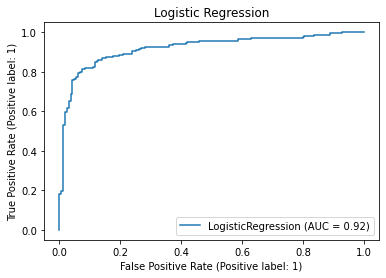

In [71]:
# AUC ROC Curve.
# Hence the accuracy is 92% which is good
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('Logistic Regression')
plt.show()

In [72]:
# Saving the model.
import pickle
filename='titanic_.pkl'
pickle.dump(lg, open(filename,'wb'))

In [73]:
# Conclusion.
import numpy as np
a=np.array(y_test)
pred=np.array(GCV_pred)
survived=pd.DataFrame({'Actual':a,'Predicted':pred})
survived

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
325,0,0
326,1,1
327,0,0
328,1,1
